<a href="https://colab.research.google.com/github/Rachita-G/Python_Practice/blob/main/Models/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIMPLE LINEAR REGRESSION

Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship. Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other. For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.
The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

y=b0+b1x


# OLSE

Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called Ordinary Least Squares. It is common to therefore refer to a model prepared this way as Ordinary Least Squares Linear Regression or just Least Squares Regression.

OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function.

* min sum(y-yhat)^2 = sum(y-(ax+b))^2

* take derivative wrt a and b and solve the derivative for b first
we get, b=mean(y)-a(mean(x))

* and then solve the other derivative, we get a=sum(xi-mean(x))(yi-mean(y))/sum(x--mean(x))^2

### STEPS
Step 1: draw a horizontal line and calculate the sum of squared residuAls

Step 2: rotate the line diagonally until you get the least sum of sqaured residuals. this is line of best fit.

Step 3: best fit line is like b0+b1x where bo is intecept and b1 is slope

Step 4: Rsqaured- how much var in y is explained by x

step 5: see adjusted R sqaured

### Assumptions of OLSE

* LINEARITY-- y=b0+b1*x+..............+bn*xn
* NO ENDOGENITY-- covariance between the independent variables and error terms is 0
* NORMALITY AND HOMOGENITY-- error term follows normal distribution with mean 0 and variance sigma squared.
* NO AUTOCORRELATION-- covariance between any 2 error terms is 0
* NO MULTICOLLINEARITY-- correlation between 2 independent variable is 0

biggest mistake is when u perform a regression that voilates its assumptions.# Checking for linearity: 
plot each Xi with Y and see if the line of best fit is linear or not.
FIXES:
* perform non linear regression
* exponential transformation
* logrithmic transformation

### 1.  Checking for linearity: 
plot each Xi with Y and see if the line of best fit is linear or not.
FIXES:
* perform non linear regression
* exponential transformation
* logrithmic transformation

### 2. No endogenity meaning:
error terms consist of all the variables that are not included in the model but affects the dep varible.
in such a case, if error term consist of some x* which is correlated with the dep var x included in the model.
the covariance between them turns out to be non zero. this is called OMMITEED VARIABLE BIAS.

### 3. Homogenity:
fixes: 
* look for omitted variable bias
* look for outliers
* log transformation-- put log on X OR Y or both

### 4. Checking for no autocorrelation:
plot the residuals on graph and you should see a scatter plot with no definite correlation between them
or by durbin watson: values lie between 1 nd 4
value=2 implies no autocorrelation.
value <1 or >3 causes alarm.
there is no remedy for this! use another method. like AR,MA,ARMA,ARIMA etc.

### 5. No multicollinearity
fixes:
* keep only one variable
* transform them into one(eg, avg price)
* keep them both(cautionary)
thus always check for the correlation between the indep variables


### 1. GPA and SAT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns 
sns.set() # overrides all the plots of matplotlib in seaborn style which is prettier.

In [ ]:
import os
os.getcwd()

'C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Codes'

In [ ]:
data=pd.read_csv("C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\SAT and GPA - Simple LR.csv")

In [ ]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [ ]:
data.describe() # descriptive stats

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [ ]:
# defining dep and indep variables
y=data["GPA"]
x1=data["SAT"]

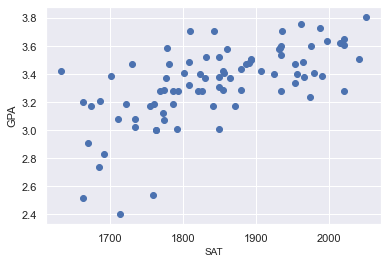

In [ ]:
#exploring the data
plt.scatter(x1,y)
plt.xlabel("SAT",fontsize=10)
plt.ylabel("GPA",fontsize=11)
plt.show()

In [ ]:
x=sm.add_constant(x1) # creating y=bo*1+b1*x1
x

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


In [ ]:
# getting the results that contain the output of OLS regression
results=sm.OLS(y,x).fit() 
# fit() method apply a specific estimation technique (OLS in this case) to obtain the fit of the model

In [ ]:
results.summary() # gives the results of OLS nd organize them in 3 tables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           7.20e-11
Time:                        11:59:29   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Checking from scratch

In [ ]:
print('mean x is', x1.mean())
print('mean y is', y.mean())

mean x is 1845.2738095238096
mean y is 3.330238095238094


In [ ]:
num=((x1-x1.mean())*(y-y.mean())).sum()
den=((x1-x1.mean())**2).sum()
a=num/den
a.round(4) # verified

0.0017

In [ ]:
b=y.mean()-a*x1.mean()
b.round(4)

0.275

## EXPLAINING THE TABLES

1. OLS TABLE

ols tries to minimise SSE

r squared= sse/sst-- propotion of variablity explained by regression from total variability.it tells us how much of variablilty is explained by our model

adjusted r squared is less than r squared which penalises for excessive use of variables

value of r squared shd be arnd 90 percent

F Statistic is used for testing the overall significance of the model.

* null hypothesis- all beta value ie, beta(i) is 0
* alternative hypothesis- atleast one beta value ie, beta(i) is 0

Null hypothsis says none of the explanatory variables taken actually affect the dependent variable.

THE LOWER THE VALUE OF F STATISTIC , THE CLOSER TO MODEL BEING INSIGNIFICANT.

2. COEFFICIENTS TABLE

1st column- estimate values for bo (intercpt) and bi, for i>=1

2nd column- the standard error in predicting the accuracy of estimation

3rd and 4th column- t statistic and p value of hypothesis testing (where Ho is bi=0 and H1 is bi is not 0).
we want p value to be less than 0.05 meaning that the respective variable is significant in the model.

NOTE:The intercept value doent matter in hypothesis testing checking if it should pass through origin or the constant value.


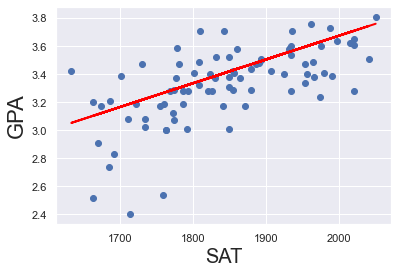

In [ ]:
#plotting line of best fit in the model
plt.scatter(x1,y)
yhat=0.0017*x1+0.275
fig=plt.plot(x1,yhat,lw=2,label="regression line",c="red")
plt.xlabel("SAT",fontsize=20)
plt.ylabel("GPA",fontsize=22)
plt.show()

# SKIKIT LEARN PACKAGE (sklearn)
* derived from the scipy toolkit 
* it is ML package
* built on numpy, skipy, and matplotlib
* very fast and efficient
* prefers working with arrays

advantages:
* it has increadible documentation-- we can learn all about the concepts from sklearn package
* it has a be used in variety for methods like regression,classifiaction, clustering, SVM, and dimensionality reduction.

disadvantages:
* it cannot perform deep learning methods. for that, tensorflow, keras, and pytorch are much better alternatives


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
data.shape

(84, 2)

In [ ]:
x=data['SAT']
y=data['GPA']

In [ ]:
x.shape

(84,)

In [ ]:
y.shape

(84,)

In [ ]:
reg=LinearRegression() # creating an instance of linear regression class
# reg.fit(x,y) # gives an error

ValueError: Expected 2D array, got 1D array instead:
array=[1714 1664 1760 1685 1693 1670 1764 1764 1792 1850 1735 1775 1735 1712
 1773 1872 1755 1674 1842 1786 1761 1722 1663 1687 1974 1826 1787 1821
 2020 1794 1769 1934 1775 1855 1880 1849 1808 1954 1777 1831 1865 1850
 1966 1702 1990 1925 1824 1956 1857 1979 1802 1855 1907 1634 1879 1887
 1730 1953 1781 1891 1964 1808 1893 2041 1893 1832 1850 1934 1861 1931
 1933 1778 1975 1934 2021 2015 1997 2020 1843 1936 1810 1987 1962 2050].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# In order to feed x to sklearn, it should be a 2D array (a matrix)
# Therefore, we must reshape it 
# Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)

In [ ]:
# x_matrix = x.values.reshape(84,1)
x_matrix= x.values.reshape(-1,1) 
x_matrix.shape

(84, 1)

In [ ]:
# Note that the first argument is the independent variable, while the second - the dependent (unlike with StatsModels)

reg=LinearRegression()
reg.fit(x_matrix,y)

# now done! all the arguments in the output are taking the default values

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

REGRESSION
Full documentation: 
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

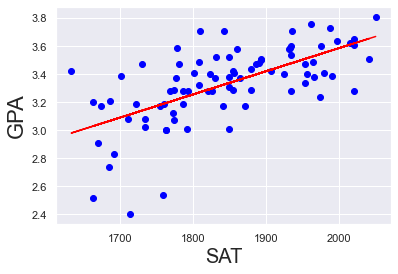

In [ ]:
plt.plot(x_matrix,reg.predict(x_matrix),c="red")
plt.scatter(x_matrix,y,c="blue")
plt.xlabel("SAT",fontsize=20)
plt.ylabel("GPA",fontsize=22)
plt.show()

In [ ]:
# coefficients
reg.coef_ 

array([0.00165569])

In [ ]:
# intercept values
reg.intercept_

0.27504029966028076

In [ ]:
# making predictions
reg.predict([[1700]])

array([3.08970998])

In [ ]:
# making predictions
test_data=pd.DataFrame(data=[1700,1650],columns=['SAT'])

In [ ]:
test_data

,SAT
0,1700
1,1650


In [ ]:
reg.predict(test_data)

array([3.08970998, 3.00692558])

In [ ]:
test_data['GPA predicted']=reg.predict(test_data)

In [ ]:
test_data

,SAT,GPA predicted
0,1700,3.089710
1,1650,3.006926


In [ ]:
# PERFORMANCE METRICS

In [ ]:
# r squared value
reg.score(x_matrix,y)

0.40600391479679765

### 2. Real estate - Price and Size

In [ ]:
# another example--REAL ESTATE
data1=pd.read_csv("C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\real_estate_price_size.csv")

In [ ]:
data1

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [ ]:
x1=data1["size"]
y=data1["price"]

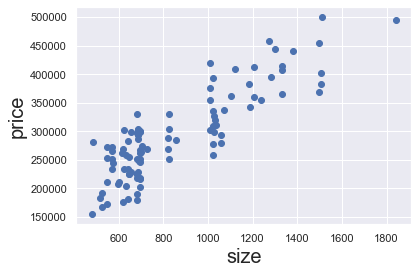

In [ ]:
plt.scatter(x1,y)
plt.xlabel("size",fontsize=20)
plt.ylabel("price",fontsize=20)
plt.show()

In [ ]:
x=sm.add_constant(x1)
x

,const,size
0,1.0,643.09
1,1.0,656.22
2,1.0,487.29
3,1.0,1504.75
4,1.0,1275.46
...,...,...
95,1.0,549.80
96,1.0,1037.44
97,1.0,1504.75
98,1.0,648.29


In [ ]:
results1=sm.OLS(y,x).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           8.13e-31
Time:                        12:01:04   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

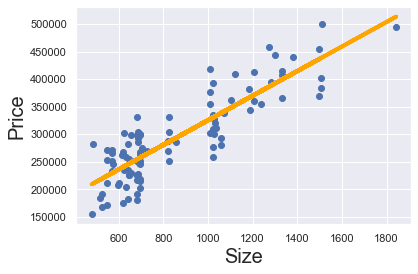

In [ ]:
plt.scatter(x1,y)
yhat = x1*223.1787+101900
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

### 3. Salary Dataset

In [ ]:
import os
os.getcwd()

'C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Codes'

In [ ]:
dataset = pd.read_csv('C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)

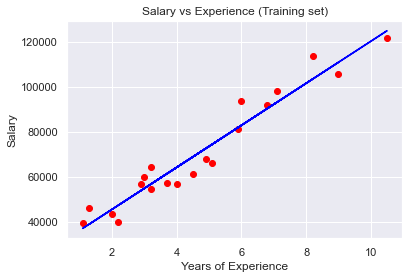

In [ ]:
## Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

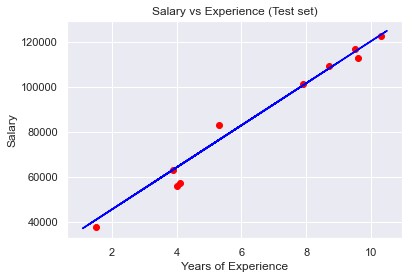

In [ ]:
## Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()